### Attribute Information

##### 1.Age: age of the patient in years

##### 2.Sex: sex of the patient

M: Male

F: Female

##### 3.ChestPainType: chest pain type

TA: Typical Angina

ATA: Atypical Angina

NAP: Non-Anginal Pain

ASY: Asymptomatic

##### 4.RestingBP: resting blood pressure in mmHg

##### 5.Cholesterol: serum cholesterol in mm/dl

##### 6.FastingBS: fasting blood sugar

1: if FastingBS > 120 mg/dl, 0: otherwise

##### 7.RestingECG: resting electrocardiogram results

Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation

or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

##### 8.MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

##### 9.ExerciseAngina: exercise-induced angina

Y: Yes,N: No

##### 10.Oldpeak: oldpeak = ST Numeric value measured in depression

##### 11.ST_Slope: the slope of the peak exercise ST segment

Up: upsloping

Flat: flat

Down: downsloping

##### 12.HeartDisease: output class

1: heart disease

0: Normal

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Exploratory Data Analysis (EDA) & Visualization

In [ ]:
# Import the dataset

df=pd.read_csv('/content/Heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.rename(columns={'HeartDisease':'HeartFailure'},inplace=True)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartFailure    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartFailure      0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartFailure
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Distribution of Heart Diseases with respect to male and female

fig=px.histogram(df,
                 x="HeartFailure",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Failure",
                 barmode="group")
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex ratio in total data")
fig.show()

#Data Cleaning and Feature Engineering

In [ ]:
# Categorical variables

cat_cols=df.select_dtypes(include='object').columns.to_list()
print(cat_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [ ]:
# Coding of categorical variables

print("Initial features:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df, dtype=float)
print("Features after get_dummies:\n", list(df_dummies.columns))

Initial features:
 ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartFailure'] 

Features after get_dummies:
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartFailure', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [ ]:
df_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartFailure,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_dummies.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartFailure,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,...,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,...,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Creating of the correlation matrix of all features:

<Axes: >

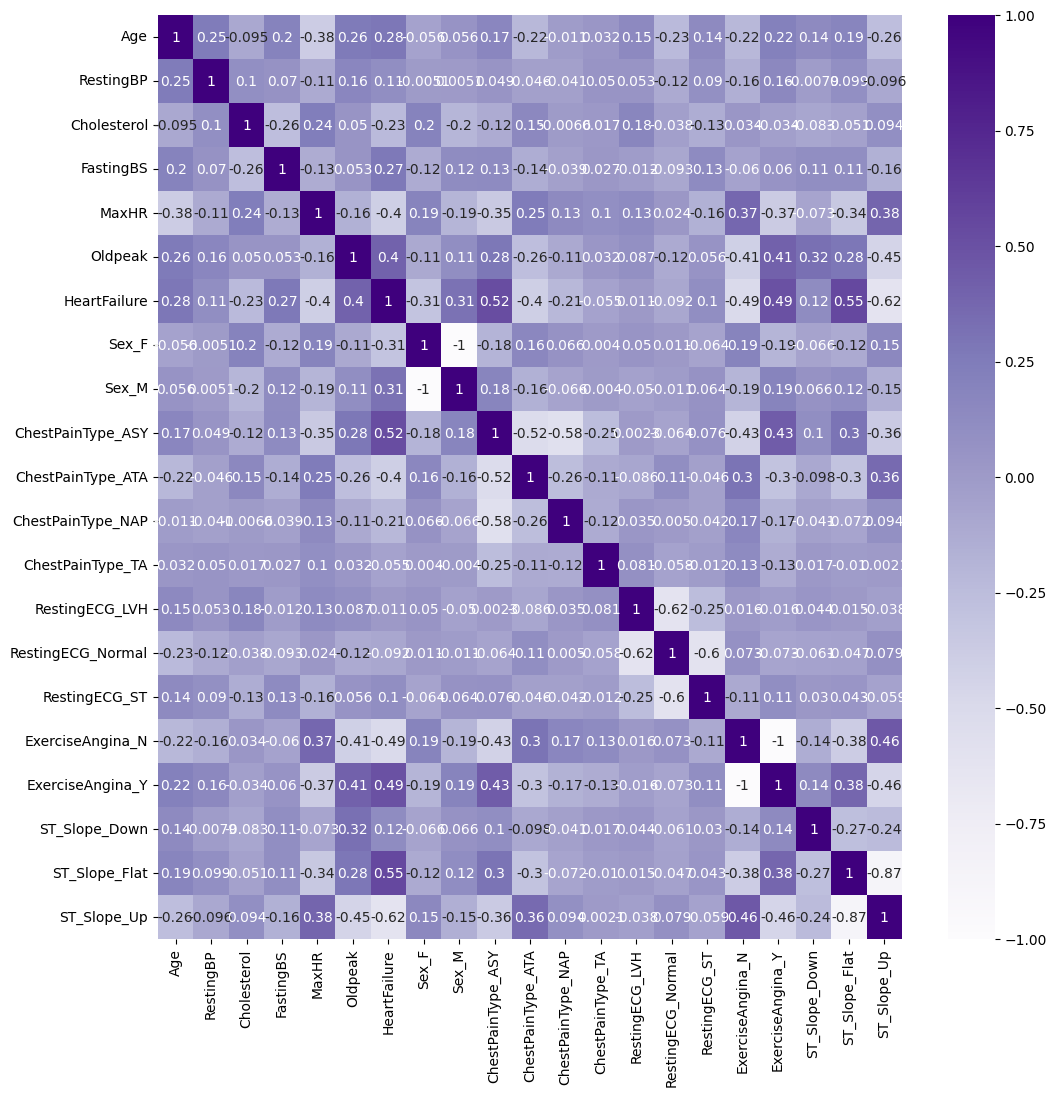

In [ ]:
# Correlation matrix

cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df_dummies.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, annot=True, cmap='Purples')

#Model Building and preprocessing

In [ ]:
# Extracting NumPy arrays X and y

X= df_dummies.drop(["HeartFailure"],axis =1)
y= df_dummies["HeartFailure"]
X= X.values
print(X.shape)
print(X.dtype)
X

(918, 20)
float64


array([[ 40., 140., 289., ...,   0.,   0.,   1.],
       [ 49., 160., 180., ...,   0.,   1.,   0.],
       [ 37., 130., 283., ...,   0.,   0.,   1.],
       ...,
       [ 57., 130., 131., ...,   0.,   1.,   0.],
       [ 57., 130., 236., ...,   0.,   1.,   0.],
       [ 38., 138., 175., ...,   0.,   0.,   1.]])

In [ ]:
y= y.values
print(y.shape)
print(y.dtype)
y

(918,)
int64


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

##### Now the data is presentedwell and we can start building the model

In [ ]:
# Split the data set into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)                     # knn
tree = DecisionTreeClassifier(random_state=0)                  # DecisionTree
rf = RandomForestClassifier(n_estimators=10, random_state=5)   # RandomForest
gbrt = GradientBoostingClassifier(random_state=10)             # GradientBoosting
xgbr = XGBClassifier(random_state=48)                          # XGB

In [ ]:
# Preprocessing by Standard Scaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN model

Model KNN:

1. Accuracy: 0.87
2. Precision: 0.88
3. Recall: 0.88
4. f1-measure: 0.88
5. Average Precision: 0.880


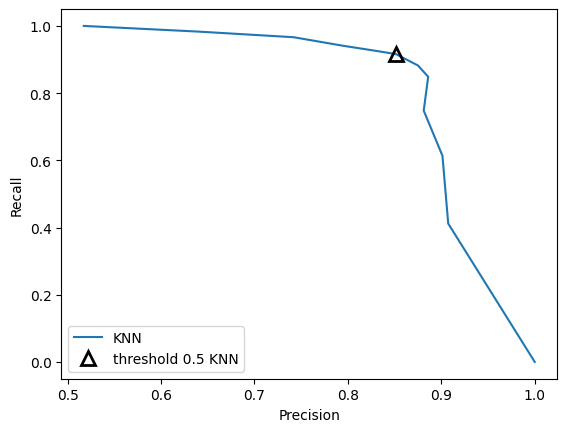

In [ ]:
# Building a KNN model and predicting
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)
acc_Knn = knn.score(X_test_scaled, y_test)
pred_Knn = knn.predict(X_test_scaled)

# For Binary Classification, the most commonly used metrics are:
# 1.Accuracy,
# 2.Precision,
# 3.Recall,
# 4.F1-measure,
# 5.Average Precision,
# 6.Area Under Curve AUC (ROC AUC),
# 7.Confusion Matrix,
# 8.Classification Report

print("Model KNN:\n")
print("1. Accuracy: {:.2f}".format(acc_Knn))
precision_Knn = precision_score(y_test, pred_Knn)
print("2. Precision: {:.2f}".format(precision_Knn))
recall_Knn = recall_score(y_test, pred_Knn)
print("3. Recall: {:.2f}".format(recall_Knn))
print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_Knn)))

predict_proba_Knn = knn.predict_proba(X_test_scaled)[:, 1]
precision_Knn, recall_Knn, thresholds_Knn = precision_recall_curve(y_test, predict_proba_Knn)

plt.plot(precision_Knn, recall_Knn, label="KNN")
close_default_Knn = np.argmin(np.abs(thresholds_Knn - 0.5))
plt.plot(precision_Knn[close_default_Knn], recall_Knn[close_default_Knn], '^', c='k', markersize=10, label="threshold 0.5 KNN", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_Knn = average_precision_score(y_test, predict_proba_Knn)
print("5. Average Precision: {:.3f}".format(ap_Knn))

6. ROC AUC: 0.911
7. Confusion matrix:
[[ 96  15]
 [ 14 105]]
8. Classification Report:
                    precision    recall  f1-score   support

Not HeartFailure       0.87      0.86      0.87       111
    HeartFailure       0.88      0.88      0.88       119

        accuracy                           0.87       230
       macro avg       0.87      0.87      0.87       230
    weighted avg       0.87      0.87      0.87       230



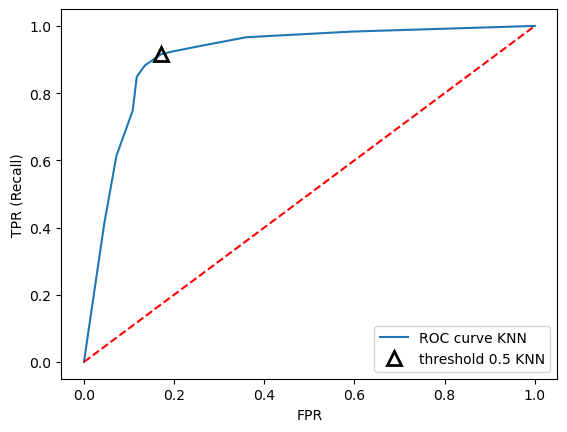

In [ ]:
fpr_Knn, tpr_Knn, thresholds_Knn = roc_curve(y_test, predict_proba_Knn)
plt.plot(fpr_Knn, tpr_Knn, label="ROC curve KNN")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_Knn = np.argmin(np.abs(thresholds_Knn - 0.5))
plt.plot(fpr_Knn[close_default_Knn], tpr_Knn[close_default_Knn], '^', markersize=10, label="threshold 0.5 KNN", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_Knn = roc_auc_score(y_test, predict_proba_Knn)
print("6. ROC AUC: {:.3f}".format(roc_auc_Knn))

confusion = confusion_matrix(y_test, pred_Knn)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_Knn, target_names=["Not HeartFailure", "HeartFailure"]))


### DecisionTree model

Model DecisionTree:

1. Accuracy: 0.82
2. Precision: 0.82
3. Recall: 0.83
4. f1-measure: 0.82
5. Average Precision: 0.768


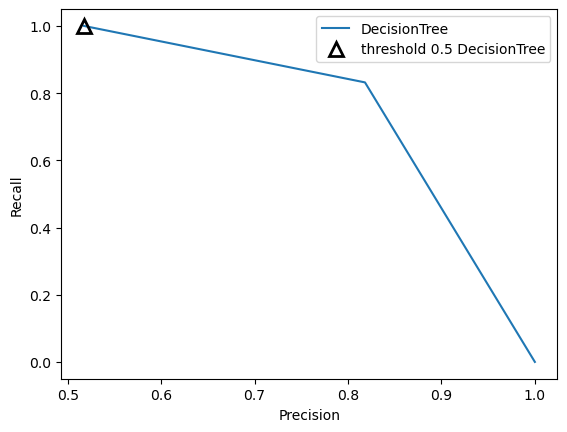

In [ ]:
# Building a DecisionTree model and predicting

tree.fit(X_train_scaled, y_train)
tree.score(X_test_scaled, y_test)
acc_tree = tree.score(X_test_scaled, y_test)
pred_tree = tree.predict(X_test_scaled)

print("Model DecisionTree:\n")
print("1. Accuracy: {:.2f}".format(acc_tree))
precision_tree = precision_score(y_test, pred_tree)
print("2. Precision: {:.2f}".format(precision_tree))
recall_tree = recall_score(y_test, pred_tree)
print("3. Recall: {:.2f}".format(recall_tree))
print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_tree)))

predict_proba_tree = tree.predict_proba(X_test_scaled)[:, 1]
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, predict_proba_tree)

plt.plot(precision_tree, recall_tree, label="DecisionTree")
close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], '^', c='k', markersize=10, label="threshold 0.5 DecisionTree", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_tree = average_precision_score(y_test, predict_proba_tree)
print("5. Average Precision: {:.3f}".format(ap_tree))

6. ROC AUC: 0.817
7. Confusion matrix:
[[89 22]
 [20 99]]
8. Classification Report:
                    precision    recall  f1-score   support

Not HeartFailure       0.82      0.80      0.81       111
    HeartFailure       0.82      0.83      0.82       119

        accuracy                           0.82       230
       macro avg       0.82      0.82      0.82       230
    weighted avg       0.82      0.82      0.82       230



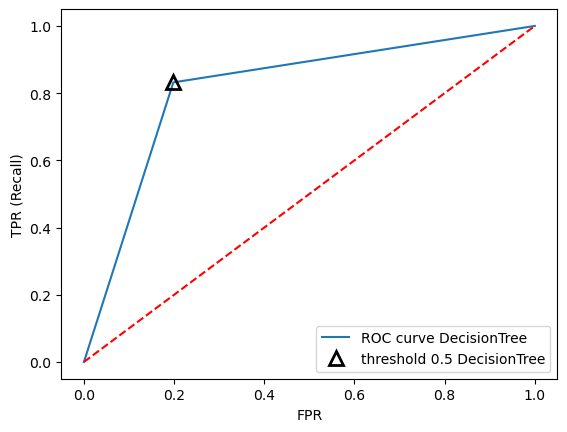

In [ ]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, predict_proba_tree)
plt.plot(fpr_tree, tpr_tree, label="ROC curve DecisionTree")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
plt.plot(fpr_tree[close_default_tree], tpr_tree[close_default_tree], '^', markersize=10, label="threshold 0.5 DecisionTree", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_tree = roc_auc_score(y_test, predict_proba_tree)
print("6. ROC AUC: {:.3f}".format(roc_auc_tree))

confusion = confusion_matrix(y_test, pred_tree)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_tree, target_names=["Not HeartFailure", "HeartFailure"]))

### RandomForest model

Model RandomForest:

1. Accuracy: 0.83
2. Precision: 0.83
3. Recall: 0.85
4. f1-measure: 0.84
5. Average Precision: 0.862


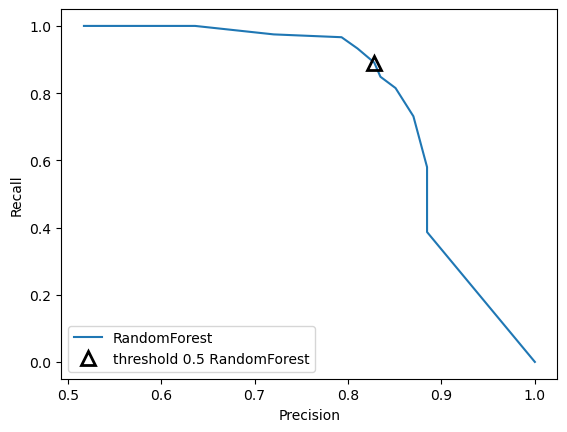

In [ ]:
# Building a RandomForest model and predicting

rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)
acc_rf = rf.score(X_test_scaled, y_test)
pred_rf = rf.predict(X_test_scaled)

print("Model RandomForest:\n")
print("1. Accuracy: {:.2f}".format(acc_rf))
precision_rf = precision_score(y_test, pred_rf)
print("2. Precision: {:.2f}".format(precision_rf))
recall_rf = recall_score(y_test, pred_rf)
print("3. Recall: {:.2f}".format(recall_rf))
print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_rf)))

predict_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, predict_proba_rf)

plt.plot(precision_rf, recall_rf, label="RandomForest")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 RandomForest", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_rf = average_precision_score(y_test, predict_proba_rf)
print("5. Average Precision: {:.3f}".format(ap_rf))

6. ROC AUC: 0.903
7. Confusion matrix:
[[ 91  20]
 [ 18 101]]
8. Classification Report:
                    precision    recall  f1-score   support

Not HeartFailure       0.83      0.82      0.83       111
    HeartFailure       0.83      0.85      0.84       119

        accuracy                           0.83       230
       macro avg       0.83      0.83      0.83       230
    weighted avg       0.83      0.83      0.83       230



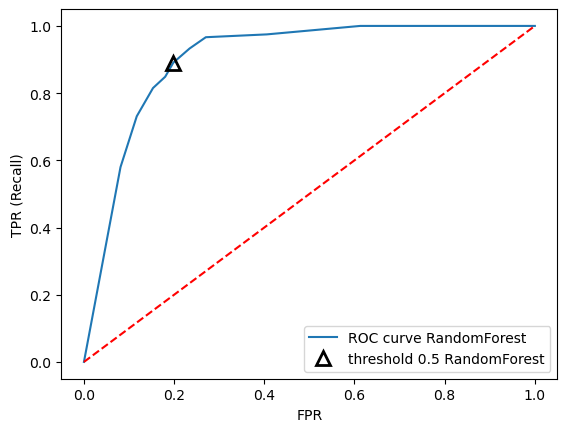

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, predict_proba_rf)
plt.plot(fpr_rf, tpr_rf, label="ROC curve RandomForest")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label="threshold 0.5 RandomForest", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_rf = roc_auc_score(y_test, predict_proba_rf)
print("6. ROC AUC: {:.3f}".format(roc_auc_rf))

confusion = confusion_matrix(y_test, pred_rf)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_rf, target_names=["Not HeartFailure", "HeartFailure"]))

### GradientBoosting model

Model GradientBoosting:

1. Accuracy: 0.87
2. Precision: 0.86
3. Recall: 0.91
4. f1-measure: 0.88
5. Average Precision: 0.914


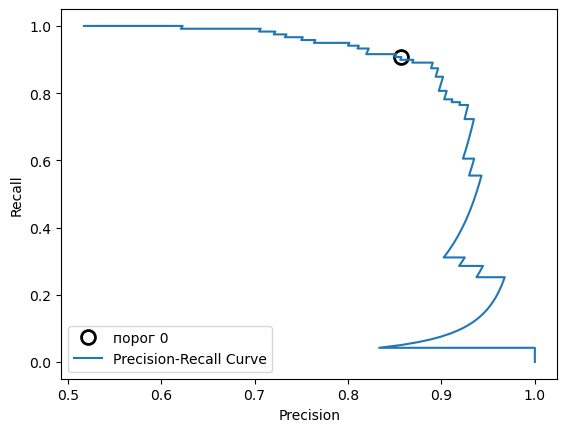

In [ ]:
# Building a GradientBoosting model and predicting

gbrt.fit(X_train_scaled, y_train)
gbrt.score(X_test_scaled, y_test)
acc_gbrt = gbrt.score(X_test_scaled, y_test)
pred_gbrt = gbrt.predict(X_test_scaled)

print("Model GradientBoosting:\n")
print("1. Accuracy: {:.2f}".format(acc_gbrt))
precision_gbrt = precision_score(y_test, pred_gbrt)
print("2. Precision: {:.2f}".format(precision_gbrt))
recall_gbrt = recall_score(y_test, pred_gbrt)
print("3. Recall: {:.2f}".format(recall_gbrt))
print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_gbrt)))

decision_function_gbrt = gbrt.decision_function(X_test_scaled)
precision_gbrt, recall_gbrt, thresholds_gbrt = precision_recall_curve(y_test, decision_function_gbrt)

close_zero = np.argmin(np.abs(thresholds_gbrt))
plt.plot(precision_gbrt[close_zero], recall_gbrt[close_zero], 'o', markersize=10, label="порог 0", fillstyle="none", c='k', mew=2)
plt.plot(precision_gbrt, recall_gbrt, label="Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_gbrt = average_precision_score(y_test, decision_function_gbrt)
print("5. Average Precision: {:.3f}".format(ap_gbrt))

6. ROC AUC: 0.931
7. Confusion matrix:
[[ 93  18]
 [ 11 108]]
8. Classification Report:
                    precision    recall  f1-score   support

Not HeartFailure       0.89      0.84      0.87       111
    HeartFailure       0.86      0.91      0.88       119

        accuracy                           0.87       230
       macro avg       0.88      0.87      0.87       230
    weighted avg       0.88      0.87      0.87       230



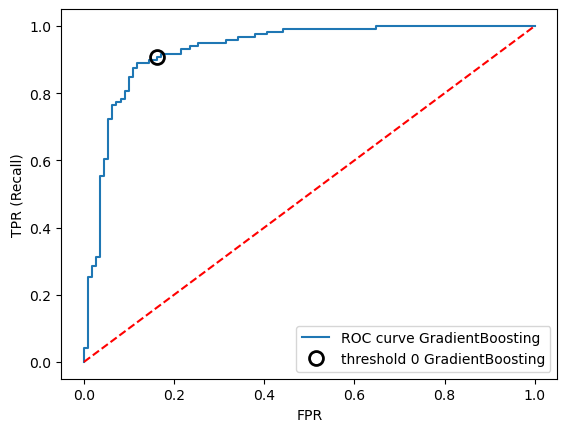

In [ ]:
fpr_gbrt, tpr_gbrt, thresholds_gbrt = roc_curve(y_test, decision_function_gbrt)
plt.plot(fpr_gbrt, tpr_gbrt, label="ROC curve GradientBoosting")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_zero = np.argmin(np.abs(thresholds_gbrt))
plt.plot(fpr_gbrt[close_zero], tpr_gbrt[close_zero], 'o', markersize=10, label="threshold 0 GradientBoosting", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_gbrt = roc_auc_score(y_test, decision_function_gbrt)
print("6. ROC AUC: {:.3f}".format(roc_auc_gbrt))

confusion = confusion_matrix(y_test, pred_gbrt)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_gbrt, target_names=["Not HeartFailure", "HeartFailure"]))

### XGB model

Model XGB:

1. Accuracy: 0.87
2. Precision: 0.86
3. Recall: 0.90
4. f1-measure: 0.88
5. Average Precision: 0.903


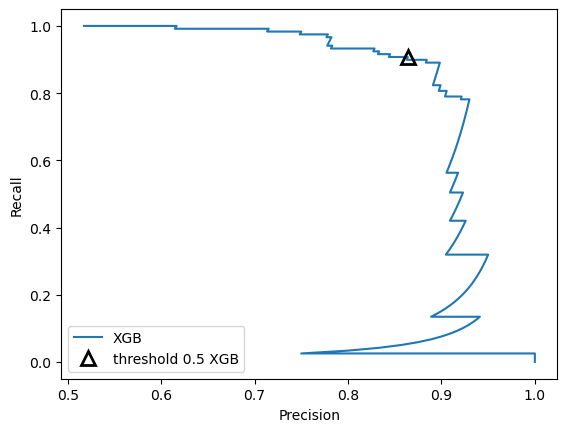

In [ ]:
# Building a XGB model and predicting

xgbr.fit(X_train_scaled, y_train)
xgbr.score(X_test_scaled, y_test)
acc_xgbr = xgbr.score(X_test_scaled, y_test)
pred_xgbr = xgbr.predict(X_test_scaled)

print("Model XGB:\n")
print("1. Accuracy: {:.2f}".format(acc_xgbr))
precision_xgbr = precision_score(y_test, pred_xgbr)
print("2. Precision: {:.2f}".format(precision_xgbr))
recall_xgbr = recall_score(y_test, pred_xgbr)
print("3. Recall: {:.2f}".format(recall_xgbr))
print("4. f1-measure: {:.2f}".format(f1_score(y_test, pred_xgbr)))

predict_proba_xgbr = xgbr.predict_proba(X_test_scaled)[:, 1]
precision_xgbr, recall_xgbr, thresholds_xgbr = precision_recall_curve(y_test, predict_proba_xgbr)

plt.plot(precision_xgbr, recall_xgbr, label="XGB")
close_default_xgbr = np.argmin(np.abs(thresholds_xgbr - 0.5))
plt.plot(precision_xgbr[close_default_xgbr], recall_xgbr[close_default_xgbr], '^', c='k', markersize=10, label="threshold 0.5 XGB", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ap_xgbr = average_precision_score(y_test, predict_proba_xgbr)
print("5. Average Precision: {:.3f}".format(ap_xgbr))

6. ROC AUC: 0.929
7. Confusion matrix:
[[ 94  17]
 [ 12 107]]
8. Classification Report:
                    precision    recall  f1-score   support

Not HeartFailure       0.89      0.85      0.87       111
    HeartFailure       0.86      0.90      0.88       119

        accuracy                           0.87       230
       macro avg       0.87      0.87      0.87       230
    weighted avg       0.87      0.87      0.87       230



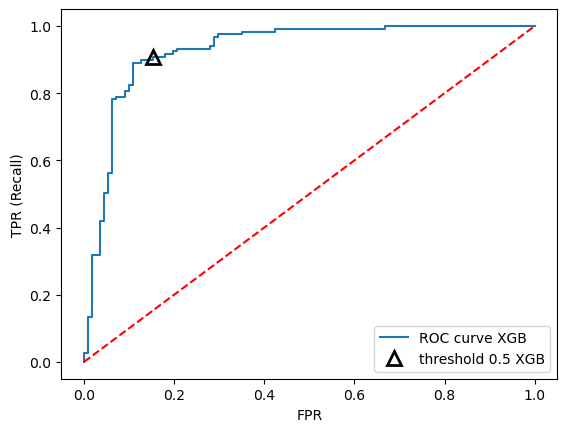

In [ ]:
fpr_xgbr, tpr_xgbr, thresholds_xgbr = roc_curve(y_test, predict_proba_xgbr)
plt.plot(fpr_xgbr, tpr_xgbr, label="ROC curve XGB")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
close_default_xgbr = np.argmin(np.abs(thresholds_xgbr - 0.5))
plt.plot(fpr_xgbr[close_default_xgbr], tpr_xgbr[close_default_xgbr], '^', markersize=10, label="threshold 0.5 XGB", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
roc_auc_xgbr = roc_auc_score(y_test, predict_proba_xgbr)
print("6. ROC AUC: {:.3f}".format(roc_auc_xgbr))

confusion = confusion_matrix(y_test, pred_xgbr)
print("7. Confusion matrix:\n{}".format(confusion))

print("8. Classification Report:\n ", classification_report(y_test, pred_xgbr, target_names=["Not HeartFailure", "HeartFailure"]))

#Model Evaluation

In [ ]:
models_acc = pd.DataFrame({
    'Model': ['KNN', 'DecisionTree', 'RandomForest',
              'GradientBoosting', 'XGB'],
    'Accuracy': [acc_Knn, acc_tree, acc_rf, acc_gbrt, acc_xgbr]})
models_acc.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,KNeighbors,0.873913
3,GradientBoosting,0.873913
4,XGB,0.873913
2,RandomForest,0.834783
1,DecisionTree,0.817391


In [ ]:
models_ROC_AUC = pd.DataFrame({
    'Model': ['KNN', 'DecisionTree', 'RandomForest',
              'GradientBoosting', 'XGB'],
    'ROC_AUC': [roc_auc_Knn, roc_auc_tree, roc_auc_rf, roc_auc_gbrt, roc_auc_xgbr]})
models_ROC_AUC.sort_values(by='ROC_AUC', ascending=False)

,Model,ROC_AUC
3,GradientBoosting,0.931335
4,XGB,0.928761
0,KNeighbors,0.911386
2,RandomForest,0.903361
1,DecisionTree,0.816867


As said, this is a comparitive study of differennt classification machine learning models. Here I have choosen 5 models which are KNN, XGB, GradientB, RandomForest and DecitionTree. As we can see, the most suitable model for my data is KNN, GradientBoosting and XGB even most of this gives good accuracy score. Here, ROC_AUC score is high for GradientB, XGB and KNN. It indicates that the classification model has good discriminative power and can effectively distinguish between the positive and negative classes.